In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel("customers.xlsx")

In [4]:
df.head(10)

,Age,Income,Gender,Marital Status,Buys
0,<21,High,Male,Single,No
1,<21,High,Male,Married,No
2,21-35,High,Male,Single,Yes
3,>35,Medium,Male,Single,Yes
4,>35,Low,Female,Single,Yes
5,>35,Low,Female,Married,No
6,21-35,Low,Female,Married,Yes
7,<21,Medium,Male,Single,No
8,<21,Low,Female,Married,Yes
9,>35,Medium,Female,Single,Yes


In [5]:
df

,Age,Income,Gender,Marital Status,Buys
0,<21,High,Male,Single,No
1,<21,High,Male,Married,No
2,21-35,High,Male,Single,Yes
3,>35,Medium,Male,Single,Yes
4,>35,Low,Female,Single,Yes
5,>35,Low,Female,Married,No
6,21-35,Low,Female,Married,Yes
7,<21,Medium,Male,Single,No
8,<21,Low,Female,Married,Yes
9,>35,Medium,Female,Single,Yes


In [6]:
df.describe()

,Age,Income,Gender,Marital Status,Buys
count,14,14,14,14,14
unique,3,3,2,2,2
top,<21,Medium,Male,Single,Yes
freq,5,6,7,7,9


In [7]:
df['Buys'].value_counts()


Yes    9
No     5
Name: Buys, dtype: int64

In [8]:
df.shape

(14, 5)

<AxesSubplot:xlabel='Buys', ylabel='count'>

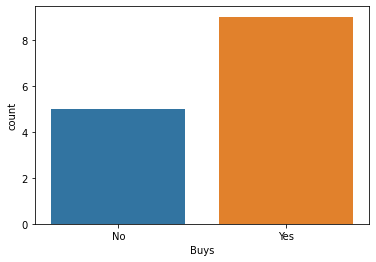

In [9]:
sns.countplot(data=df,x='Buys')

In [10]:
from sklearn.preprocessing  import LabelEncoder
l = LabelEncoder()
x = df.iloc[:,:-1]
x=x.apply(l.fit_transform)

In [11]:
y = df.iloc[:,-1]

In [12]:
y

0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: Buys, dtype: object

In [13]:
x

,Age,Income,Gender,Marital Status
0,1,0,1,1
1,1,0,1,0
2,0,0,1,1
3,2,2,1,1
4,2,1,0,1
5,2,1,0,0
6,0,1,0,0
7,1,2,1,1
8,1,1,0,0
9,2,2,0,1


In [14]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier (criterion = 'entropy')
classifier.fit(x,y)

DecisionTreeClassifier(criterion='entropy')

In [15]:
test= np.array([1,1,0,0])
pred_y = classifier.predict ([test])
print("Prediction for given input",test,"is",pred_y[0],'.')

Prediction for given input [1 1 0 0] is Yes .


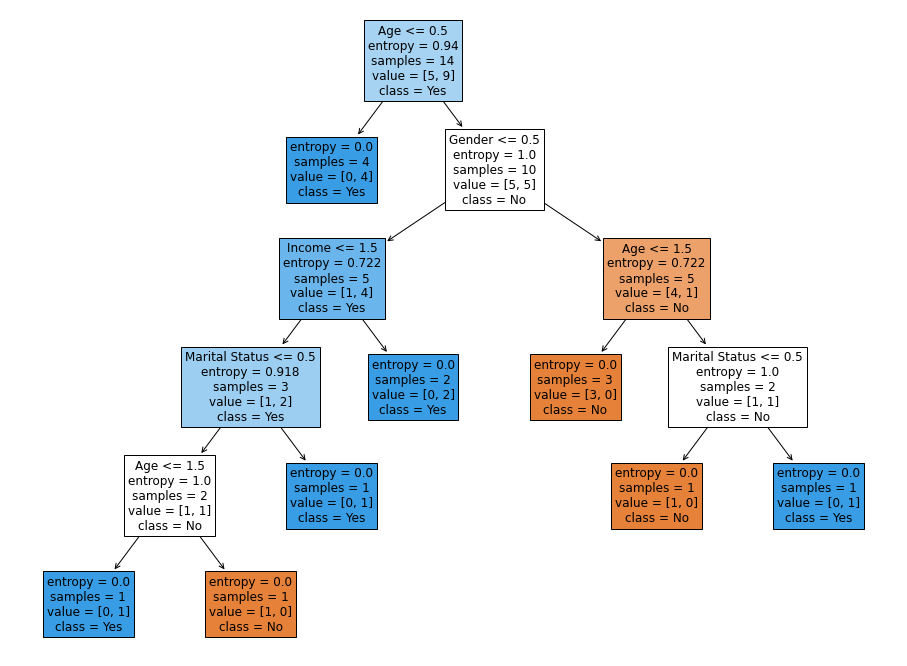

In [16]:
from sklearn.tree import plot_tree 
fig = plt.figure(figsize = (16,12))
a= plot_tree (classifier, feature_names = df.columns , fontsize = 12, filled = True, class_names=['No','Yes'])